In [5]:
import json
import munch
import numpy as np
import equations as eqn
import PA_plot as pap
import matplotlib.pyplot as plt
from IPython.display import Markdown, Latex, display
import scipy.stats as sts
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

config_path = r'/Users/arashfahim/Documents/Corporate-Governance-and-Asset-Pricing/Jupyter_data'

import warnings
warnings.filterwarnings('ignore')



# Parameters

In [6]:
config_dict = {
        "Parameters": {
        "\u03bc:": 1.0,#mu
        "\u03b3:": 0.2,#gamma
        "r:": 0.1, #kappa
        "\u03bb": 0.5,# lambda
        "\u03c3": [ # sigma
        1/(1+i) for i in range(1:2)
        ],
        "\u03c1": [# rho
        i*0.1 for i in range(1:2)
        ]
        },
        "Numerical_settings": {
        "range": 10.0,
        "Number_of_points": 2000,
        "df0": 5,
        "Stop_criterion_for_F_ODE": 0.001,
        "Upper_dy_lim": 1000,
        "Lower_dy_lim": 0.1,
        "num_iterations": 200
        },
        "color": "green"
        }

config_dict1 = {
        "Parameters": {
        "\u03bc:": 1.0,#mu
        "\u03b3:": 0.2,#gamma
        "r:": 0.1, #kappa
        "\u03bb": 0.5,# lambda
        "\u03c3": [ # sigma
        1/(1+i) for i in range(2:3)
        ],
        "\u03c1": [# rho
        i*0.1 for i in range(2:3)
        ]
        },
        "Numerical_settings": {
        "range": 10.0,
        "Number_of_points": 2000,
        "df0": 5,
        "Stop_criterion_for_F_ODE": 0.001,
        "Upper_dy_lim": 1000,
        "Lower_dy_lim": 0.1,
        "num_iterations": 200
        },
        "color": "green"
        }

SyntaxError: invalid syntax (610326287.py, line 8)

In [ ]:
config = munch.munchify(config_dict)
config1 = munch.munchify(config_dict1)

# Soving the ODEs

In [ ]:
PA_list=[]

PA_tmp = getattr(eqn, "eqn_FfS")(config)
print('[mu, gamma, r ,lmb ,sgm, rho]: ',PA_tmp.param)
PA_tmp.bvp()
print(PA_tmp.message)
PA_list.append(PA_tmp)

PA_tmp1 = getattr(eqn, "eqn_FfS")(config1)
print('[mu, gamma, r ,lmb ,sgm, rho]: ',PA_tmp1.param)
PA_tmp1.bvp()
print(PA_tmp1.message)
PA_list.append(PA_tmp1)

Switching values and active regimes:
 
0  to  1  at Gamma_ 1  =  -1.067  

[mu, gamma, r ,lmb ,sgm, rho]:  [1.0, 0.2, 0.1, 0.5, [1.0, 0.5], [0.0, 0.1]]
var =  8e-05        Iteration =  25
BVP for S is solved in 3.83903 seconds.

BVP for T is solved in 3.237033 seconds.

BVP for C is solved in 6.174997 seconds.


This solves the value function as a function of w, the agent's utility.

If the three numbers below, approximations of payment boundary by three methods,are almost equal, the scheme is working. 
Otherwise, reset df0 in the json file and run the code again.
Calculation of payment boundary by three methods: 
Minimum of abs(F-(mu-gamma*x)/r,  Minimum of abs(dF+1), and Minimum of abs(ddF) are, respectively, at
1.76088, 1.83092, and 1.75088. 
The value of dF(0) is 21.30888. 
If the principal has the bargaining power, the minimum utility of the agent is 0.86043.
The initial capital to start implemeting the contract is 1.72086.  
The divident boundary is given by 3.53177. 
The switchi

In [ ]:
SOL = PA_list[0]
SOL1 = PA_list[1]


In [4]:
C = np.array(SOL.C)
C1 = np.array(SOL1.C)
plt.plot(SOL.mS,C);
plt.plot(SOL1.mS,C1);
np.savetxt('C_vs_m.dat', np.column_stack((SOL1.mS, C1)), delimiter=',')

NameError: name 'SOL' is not defined

In [3]:
ind = SOL.mS.shape[0]
ind1 = SOL1.mS.shape[0]
plt.plot(SOL.mS,SOL.f[:ind]+SOL.mS+(1-SOL.param[3])*SOL.S + SOL.C)
plt.plot(SOL1.mS,SOL1.f[:ind1]+SOL1.mS+(1-SOL1.param[3])*SOL1.S + SOL1.C);

NameError: name 'SOL' is not defined

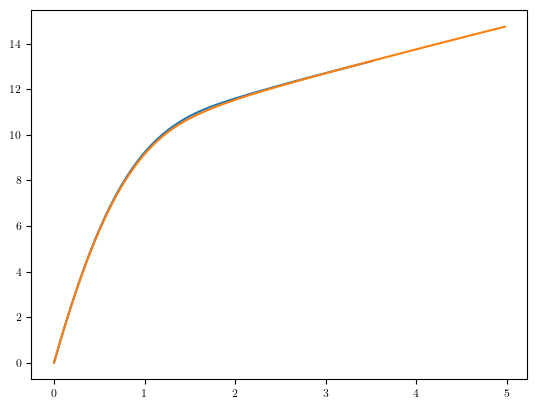

In [ ]:
ind = SOL.mS.shape[0]
ind1 = SOL1.mS.shape[0]
plt.plot(SOL.x[:ind]/SOL.param[4][-1],SOL.f[:ind]+SOL.x[:ind]/SOL.param[4][-1]+(1-SOL.param[3])*SOL.S + SOL.C)
plt.plot(SOL1.x[:ind1]/SOL1.param[4][-1],SOL1.f[:ind1]+SOL1.x[:ind1]/SOL1.param[4][-1]+(1-SOL1.param[3])*SOL1.S + SOL1.C);